#                                                 **Trabajo practico grupo 1**

#### **Se importan las librerias**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import re

#### **Se levanta la base**

In [ ]:
#Se carga la base
data = pd.read_csv("../DH/TP/properatti.csv")
data.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


##### **Primer analisis de la base y sus datos**

In [ ]:
#La base cuenta con 121.220 filas y 25 columnas
data.shape

(121220, 26)

In [ ]:
data.describe(include="all")

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
count,121220.000000,121220,121220,121197,121220,121220,121220,1.025030e+05,69670,69670.000000,...,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04,121220,121218,121220,118108
unique,NaN,1,4,1060,1164,1,28,NaN,47203,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,121220,104055,72705,114389
top,NaN,sell,apartment,Córdoba,|Argentina|Santa Fe|Rosario|,Argentina,Capital Federal,NaN,"-34.4026444,-58.6684776",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/1ccmb_venta_depart...,AVISO LEGAL: Las descripciones arquitectónicas...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/5/yyMiu8BHQI9KXC...
freq,NaN,121220,71065,9254,8504,121220,32316,NaN,312,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,358,4855,255
mean,60609.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.574442e+06,NaN,-34.626210,...,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03,NaN,NaN,NaN,NaN
std,34993.344153,NaN,NaN,NaN,NaN,NaN,NaN,3.541306e+05,NaN,1.980936,...,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.427208e+06,NaN,-54.823985,...,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00,NaN,NaN,NaN,NaN
25%,30304.750000,NaN,NaN,NaN,NaN,NaN,NaN,3.430234e+06,NaN,-34.669065,...,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03,NaN,NaN,NaN,NaN
50%,60609.500000,NaN,NaN,NaN,NaN,NaN,NaN,3.433910e+06,NaN,-34.597985,...,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03,NaN,NaN,NaN,NaN
75%,90914.250000,NaN,NaN,NaN,NaN,NaN,NaN,3.836668e+06,NaN,-34.441299,...,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

In [ ]:
#Hay una cantidad de missing importante en varias columnas
data.isna().sum()/data.shape[0]*100

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


In [ ]:
#Comenzamos a explorar las columnas vinculadas a la ubicación
print(data.place_name.unique())
print(data.place_with_parent_names.unique())
print(data.country_name.unique())
print(data.state_name.unique())

['Mataderos' 'La Plata' 'Liniers' ... 'Laguna Paiva' 'Malabrigo'
 'Altos de Hudson I']
['|Argentina|Capital Federal|Mataderos|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|'
 '|Argentina|Capital Federal|Liniers|' ...
 '|Argentina|Santa Fe|Laguna Paiva|' '|Argentina|Santa Fe|Malabrigo|'
 '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|']
['Argentina']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']


In [ ]:
#Aca vamos a probar si vale la pena limpiar por Cordoba NO SE SI ES CORDOBA CIUDAD O PROVINCIA#
mask_place_name = data.place_name == 'Córdoba'
print(data[mask_place_name]["place_with_parent_names"].unique())
print(data[mask_place_name].shape)
#Se entiendo que solo es Corboda Ciudad por la poca cantidad#

['|Argentina|Córdoba|Córdoba|' '|Argentina|Córdoba|']
(9254, 26)


**Se entiende que filtrando por la columna "Place Name" solo es Corboda Ciudad por ser menor cantidad que la columna "State_Name"**

In [ ]:
#El paso siguiente es verificar que el nombre conjunto es el mismo que las columnas "Place_Name" y "State_Name"#

place_name_serie = pd.Series(data.place_with_parent_names)

lista_separadas = data.place_with_parent_names.str.split("|")
lista_separadas_pos0 = lista_separadas.str.get(0)
print(lista_separadas_pos0.unique())

lista_separadas_pos99 = lista_separadas.str.get(-1)
print(lista_separadas_pos99.unique())

place_name_serie_1 = pd.Series(lista_separadas.str.get(1))
print(place_name_serie_1[1])
place_name_serie_2 = pd.Series(lista_separadas.str.get(2))
print(place_name_serie_2[1])
place_name_serie_3 = pd.Series(lista_separadas.str.get(3))
print(place_name_serie_3[1])
place_name_serie_4 = pd.Series(lista_separadas.str.get(4))
print(place_name_serie_4[1])
place_name_serie_5 = pd.Series(lista_separadas.str.get(5))
print(place_name_serie_5.value_counts())
place_name_serie_6 = pd.Series(lista_separadas.str.get(6))
place_name_serie_6.value_counts()

#Vemos que separando por el caracter | se puede obtener mas informacion, llegando hasta 5 niveles

['']
['']
Argentina
Bs.As. G.B.A. Zona Sur
La Plata

                             39892
Barrio Los Alisos              278
Barrio La Alameda               62
BarrioPortezuelo                54
Barrio Los Lagos                39
Barrio El Golf                  32
Enyoi                           17
Barrio Los Castores             14
QBay Yacht                      13
Barrio La Isla                  10
Barrio Las Glorietas            10
Islas del Canal                  6
Barrio Los Sauces                4
Barrio Barrancas del Lago        4
Barrio Cabos del Lago            3
Barrio El Yacht                  1
Barrio Los Tilos                 1
Name: place_with_parent_names, dtype: int64


    548
Name: place_with_parent_names, dtype: int64

In [ ]:
#junto todas las series en un dataframe#

lugares_clean = pd.DataFrame({'nivel_1': place_name_serie_1,'nivel_2': place_name_serie_2, 'nivel_3': place_name_serie_3, 'nivel_4': place_name_serie_4, 'nivel_5': place_name_serie_5})
#Juntamos los 2 dataframes#

data_lugares_clean = pd.concat([data,lugares_clean], axis= 1)
data_lugares_clean

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,expenses,properati_url,description,title,image_thumbnail,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,Argentina,Capital Federal,Mataderos,,NaN
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,,NaN
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...,Argentina,Capital Federal,Mataderos,,NaN
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...,Argentina,Capital Federal,Liniers,,NaN
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Centro,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121215,121215,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,NaN,NaN,...,10000.0,http://www.properati.com.ar/1cja2_venta_depart...,TORRE FORUM ALCORTA - MÁXIMA CATEGORÍA.Impecab...,Torre Forum Alcorta- Impecable 3 ambientes,https://thumbs4.properati.com/1/bjms0KnaAnlNoQ...,Argentina,Capital Federal,Belgrano,,NaN
121216,121216,sell,house,Beccar,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Argentina,Bs.As. G.B.A. Zona Norte,3436080.0,NaN,NaN,...,NaN,http://www.properati.com.ar/1cja6_venta_casa_b...,Excelente e impecable casa en Venta en Las Lom...,Ruca Inmuebles | Venta | Lomas de San Isidro |...,https://thumbs4.properati.com/2/PCc3WuQDjpNZc4...,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,Beccar,
121217,121217,sell,apartment,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5706388726,-58.4755963355",-34.570639,...,NaN,http://www.properati.com.ar/1cja7_venta_depart...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,VENTA DEPARTAMENTO AMBIENTE DIVISIBLE A ESTREN...,https://thumbs4.properati.com/9/YAe_-2gRVykADP...,Argentina,Capital Federal,Villa Urquiza,,NaN
121218,121218,sell,apartment,Plaza Colón,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,NaN,NaN,NaN,...,NaN,http://www.properati.com.ar/1cja8_venta_depart...,"2 Amb al contrafrente, luminoso. El departame...",2 amb. C/ dep. de servicio al contrafrente| Re...,https://thumbs4.properati.com/8/Q12PTvU6BQJ0ib...,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,Plaza Colón,


In [ ]:
#Comparemos si están los nombres de las ciudades/ lugares #

print(data_lugares_clean.nivel_1.unique())
print(data_lugares_clean.nivel_2.unique())
print(data_lugares_clean.nivel_3.unique())
print(data_lugares_clean.nivel_4.unique())
print(data_lugares_clean.nivel_5.unique())

['Argentina']
['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Buenos Aires Costa Atlántica'
 'Entre Ríos' 'Bs.As. G.B.A. Zona Norte' 'Santa Fe' 'Córdoba'
 'Bs.As. G.B.A. Zona Oeste' 'Misiones' 'Buenos Aires Interior' 'Salta'
 'Neuquén' 'Río Negro' 'San Luis' 'Mendoza' 'Corrientes' 'Chubut'
 'Tucumán' 'La Pampa' 'Chaco' 'San Juan' 'Santa Cruz' 'Tierra Del Fuego'
 'Catamarca' 'Santiago Del Estero' 'Jujuy' 'La Rioja' 'Formosa']
['Mataderos' 'La Plata' 'Liniers' 'Mar del Plata' 'Gualeguaychú'
 'Vicente López' 'Belgrano' 'Rosario' 'Córdoba' 'San Miguel' 'San Isidro'
 'Palermo' 'Tigre' 'Villa Giardino' 'General Rodríguez' 'Pilar' 'Morón'
 'Flores' 'Boedo' 'Malagueño' 'Las Cañitas' 'Villa Carlos Paz'
 'Puerto Madero' 'Balvanera' 'Escobar' 'Caballito' 'Nuñez' 'Berazategui'
 'General San Martín' 'Ituzaingó' 'Posadas' 'Tres de Febrero'
 'San Bernardo' 'San Telmo' 'Almagro' '' 'San Fernando' 'Pinamar' 'Colón'
 'Luján' 'San Lorenzo' 'La Matanza' 'Lanús' 'Punilla' 'Villa Gesell'
 'Lomas de Zamora' 'Sa

In [ ]:
data_lugares_clean['col_dummie_CBA'] = (data_lugares_clean.nivel_3 == 'Córdoba') 

mask_true = data_lugares_clean['col_dummie_CBA'] == True
mask_true_2 = data_lugares_clean['property_type'] == 'apartment'

mask_conjunta = mask_true_2 & mask_true

data_lugares_clean_CBA = data_lugares_clean[mask_conjunta]
data_lugares_clean_CBA.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,properati_url,description,title,image_thumbnail,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,col_dummie_CBA
32,32,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4053736,-64.1562667",-31.405374,...,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,https://thumbs4.properati.com/0/VUXj3pHJP7wl8p...,Argentina,Córdoba,Córdoba,,NaN,True
88,88,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.3987492,-64.1918878",-31.398749,...,http://www.properati.com.ar/15bzp_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Cofico 1d con terraza ppia con asador,https://thumbs4.properati.com/7/zLBENHoruvv1EA...,Argentina,Córdoba,Córdoba,,NaN,True
89,89,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4283549,-64.205149",-31.428355,...,http://www.properati.com.ar/15bzr_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Muy amplio departamento sobre Julio A. R,https://thumbs4.properati.com/8/KuU0BfxxwafmkJ...,Argentina,Córdoba,Córdoba,,NaN,True
90,90,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4088498,-64.1979565",-31.408850,...,http://www.properati.com.ar/15bzx_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,EXCELENTE | MENDOZA 237 | MTS PLAZA COLO,https://thumbs4.properati.com/2/LLZGC1vVL8TFEd...,Argentina,Córdoba,Córdoba,,NaN,True
92,92,sell,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Argentina,Córdoba,3860259.0,"-31.4244069,-64.1800624",-31.424407,...,http://www.properati.com.ar/15c03_venta_depart...,Departamento en Venta de 2 dorm. en Cordoba,Depto en Nva Cba - Edificio Eystam,https://thumbs4.properati.com/5/3UclkUmwhvDyyo...,Argentina,Córdoba,Córdoba,,NaN,True


El analisis final nos arroja que, al usar place name, nos arriegamos a estar incluyendo registros que pueden o no ser de Cordoba Ciudad(podrian ser de provincia Cordoba) asi que elegimos usar la informacion de place_with_parent_names, aun perdiendo parte de la informacion. Preferimos tener menos registros pero estar 100 % seguros que corresponden a CBA capital.

### Creamos el dataframe segmentado, el que vamos a usar definitivo

Como conclusión del analisis de las ubicaciones en el filtrado del dataframe, utilizaremos la columna "place_with_parent_names" con la ubicación Córdoba Córdoba

In [ ]:
##Definimos la mascara de departamentos
mascara_apartment = data['property_type'] == 'apartment'
#Definimos la mascara de Córdoba, capital
mascara_cordoba_ciudad = data['place_with_parent_names'] == '|Argentina|Córdoba|Córdoba|'
#Definimos la mascara conjunta
mascara_conjunta_cordoba = mascara_apartment & mascara_cordoba_ciudad
#Definimos el nuevo dataframe con los datos de Córdoba
data_cba = data.loc[mascara_conjunta_cordoba,:]

In [ ]:
##Chequeamos valores unicos
data_cba['place_name'].unique()

array(['Córdoba'], dtype=object)

In [ ]:
#Tambien chequeamos valores unicos
data_cba['place_with_parent_names'].unique()

array(['|Argentina|Córdoba|Córdoba|'], dtype=object)

In [ ]:
data_cba.isna().sum()

Unnamed: 0                       0
operation                        0
property_type                    0
place_name                       0
place_with_parent_names          0
country_name                     0
state_name                       0
geonames_id                      0
lat-lon                       2320
lat                           2320
lon                           2320
price                          838
currency                       838
price_aprox_local_currency     838
price_aprox_usd                838
surface_total_in_m2           2297
surface_covered_in_m2         1510
price_usd_per_m2              2689
price_per_m2                  1977
floor                         3592
rooms                         2635
expenses                      3494
properati_url                    0
description                      0
title                            0
image_thumbnail                209
dtype: int64

In [ ]:
#Vemos las columnas
data_cba.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [ ]:
#Definimos las columnas iniciales. Mas tarde incluiremos las otras
lista_columnas_iniciales = ['Unnamed: 0', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2',
       'rooms',  'properati_url', 'description', 'title']

Estoy removiendo los datos geograficos, la columna image, la columna place_with_parent_names, state_name y place_name que solo traen un resultado dado que es todo de cordoba, country_name dado que solo trae Argentina, operation que solo trae resultado sell y property_type que solo trae resultado apartment.
Tambien estoy removiendo floor, rooms, expenses por no tener suficientes datos de valor.

In [ ]:
#Actualizo el nuevo df con las columnas elegidas
data_cba = data_cba.loc[:,lista_columnas_iniciales]

In [ ]:
#Reseteo el index y dropeo la columna que se generaria con los viejos valores(en caso de querer agregar otras
# columnas utilizaremos Unnamed: 0)
data_cba = data_cba.reset_index(drop=True)

In [ ]:
data_cba.head(2)

,Unnamed: 0,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title
0,32,550000.0,ARS,544262.59,30846.02,50.0,50.0,616.9204,11000.0,3.0,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon
1,88,990000.0,USD,17468055.00,990000.00,NaN,NaN,NaN,NaN,1.0,http://www.properati.com.ar/15bzp_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Cofico 1d con terraza ppia con asador


In [ ]:
data_cba.describe()

,Unnamed: 0,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
count,3919.000000,3.081000e+03,3.081000e+03,3.081000e+03,1622.000000,2409.000000,1230.000000,1.942000e+03,1284.000000
mean,78815.624394,9.024850e+05,2.846348e+06,1.613164e+05,340.480888,67.241179,1309.477322,1.775138e+04,3.002336
std,33030.992768,7.328068e+05,4.971668e+06,2.817687e+05,5307.114169,101.676864,605.417298,3.564738e+04,2.086028
min,32.000000,2.300000e+04,1.120191e+05,6.348670e+03,0.000000,1.000000,1.184571,5.246914e+01,1.000000
25%,57709.500000,1.420000e+05,9.880920e+05,5.600000e+04,50.000000,44.000000,1011.540582,1.944444e+03,2.000000
50%,86622.000000,9.000000e+05,1.385396e+06,7.851714e+04,58.000000,52.000000,1261.882679,1.925000e+04,2.000000
75%,108945.500000,1.360000e+06,2.020699e+06,1.145229e+05,80.000000,72.000000,1538.758411,2.603125e+04,4.000000
max,120979.000000,6.665000e+06,5.646240e+07,3.200000e+06,107000.000000,4193.000000,14960.000000,1.236000e+06,20.000000


### Empezamos a analizar el nuevo df

In [ ]:
#Tenemos 3919 registros y 13 columnas
data_cba.shape


(3919, 13)

In [ ]:
#Traemos datos generales, como los Dtypes y los nulos
data_cba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3919 non-null   int64  
 1   price                       3081 non-null   float64
 2   currency                    3081 non-null   object 
 3   price_aprox_local_currency  3081 non-null   float64
 4   price_aprox_usd             3081 non-null   float64
 5   surface_total_in_m2         1622 non-null   float64
 6   surface_covered_in_m2       2409 non-null   float64
 7   price_usd_per_m2            1230 non-null   float64
 8   price_per_m2                1942 non-null   float64
 9   rooms                       1284 non-null   float64
 10  properati_url               3919 non-null   object 
 11  description                 3919 non-null   object 
 12  title                       3919 non-null   object 
dtypes: float64(8), int64(1), object(4

In [ ]:
#Calculamos el porcentaje de nulos
round(data_cba.isna().sum()/ data_cba.shape[0]*100)

Unnamed: 0                     0.0
price                         21.0
currency                      21.0
price_aprox_local_currency    21.0
price_aprox_usd               21.0
surface_total_in_m2           59.0
surface_covered_in_m2         39.0
price_usd_per_m2              69.0
price_per_m2                  50.0
rooms                         67.0
properati_url                  0.0
description                    0.0
title                          0.0
dtype: float64

### Limpieza de columna 'price' y 'currency'

#### Empezamos estandarizando dolar y convirtiendo todas las columnas ars a dolar

In [ ]:
#Intento estandarizar precio a dolar
data_cba['currency'].value_counts()

ARS    1848
USD    1233
Name: currency, dtype: int64

In [ ]:
#Genero mascara para buscar pesos
mascara_pesos = data_cba['currency'] == 'ARS'
#Definimos un df que solo sean con valores ARS
data_cba.loc[mascara_pesos,['price', 'currency', 'price_aprox_usd']].head()

,price,currency,price_aprox_usd
0,550000.0,ARS,30846.02
10,2030000.0,ARS,113849.86
11,2199000.0,ARS,123328.00
12,2450000.0,ARS,142915.47
13,1150000.0,ARS,67082.77


In [ ]:
#Recorro todas las filas dividiendo price por el valor aprox en usd para encontrar el valor del dolar. A esa
#serie resultante le hago un mean.


data_mascara_pesos = data_cba.loc[mascara_pesos,['price', 'currency', 'price_aprox_usd']]
valor_dolar= data_mascara_pesos.apply(lambda x: x['price'] / x['price_aprox_usd'],axis=1).mean()
valor_dolar


17.813307509321753

In [ ]:
#Actualizo los valores de price dividiendo por el valor estandarizado de dolar
#Genero una columna nueva para no pisar la anterior
data_cba["price_usd"] = data_cba["price"]
data_cba.loc[mascara_pesos, "price_usd"] =(data_mascara_pesos['price'] / valor_dolar).round(2)
data_cba.loc[mascara_pesos,['price_usd','price', 'currency', 'price_aprox_usd']].head()



,price_usd,price,currency,price_aprox_usd
0,30875.79,550000.0,ARS,30846.02
10,113959.75,2030000.0,ARS,113849.86
11,123447.04,2199000.0,ARS,123328.00
12,137537.62,2450000.0,ARS,142915.47
13,64558.48,1150000.0,ARS,67082.77


In [ ]:
#Chequeo si hay datos de valor en las columnas price_aprox_local_currency, price_aprox_usd, price_per_m2 y price_usd_per_m2 para las filas nulas
mascara_precios_nulos = data_cba['price'].isna()
print(data_cba.loc[mascara_precios_nulos,'price_aprox_local_currency'].value_counts())
print(data_cba.loc[mascara_precios_nulos,'price_aprox_usd'].value_counts())
print(data_cba.loc[mascara_precios_nulos,'price_per_m2'].value_counts())
print(data_cba.loc[mascara_precios_nulos,'price_usd_per_m2'].value_counts())


Series([], Name: price_aprox_local_currency, dtype: int64)
Series([], Name: price_aprox_usd, dtype: int64)
Series([], Name: price_per_m2, dtype: int64)
Series([], Name: price_usd_per_m2, dtype: int64)


In [ ]:
#Genero mascara para usar en celda siguiente
mascara_precios_nulos = data_cba.currency == "ARS"
data_mascara_nulos = data_cba.loc[mascara_precios_nulos,['price','price_usd', 'price_usd_per_m2', 'price_per_m2']]


In [ ]:
#Actualizo los valores de price_m2 dividiendo por el valor estandarizado de dolar. Genero nueva columna
data_cba["price_m2_usd_cal"] = data_cba["price_usd_per_m2"]
data_cba.loc[mascara_precios_nulos, "price_m2_usd_cal"] = (data_mascara_nulos['price_per_m2'] /valor_dolar).round(2)
data_cba.loc[mascara_precios_nulos,['price_m2_usd_cal','price_per_m2', 'price_usd_per_m2']].head(20)

,price_m2_usd_cal,price_per_m2,price_usd_per_m2
0,617.52,11000.000000,616.920400
10,2110.37,37592.592593,2108.330741
11,1899.19,33830.769231,1897.353846
12,1833.83,32666.666667,1504.373368
13,1434.63,25555.555556,1397.557708
15,1603.94,28571.428571,1602.390714
18,1309.88,23333.333333,1308.619067
66,NaN,NaN,NaN
67,2271.03,40454.545455,2022.710390
68,2267.97,40400.000000,2005.657021


In [ ]:
data_cba["price_m2_usd_cal"].sort_values().head(50)

394      18.410000
442      70.170000
345      97.310000
2091    126.310000
2141    127.100000
644     140.340000
373     142.350000
913     182.950000
870     240.430000
2370    269.460000
969     286.930000
2636    308.760000
262     326.920000
719     333.333333
1076    343.840000
3018    349.980000
2822    381.910000
496     392.960000
393     403.100000
1040    407.580000
728     412.440000
2667    421.030000
520     421.030000
784     433.790000
941     441.080000
307     452.290000
2614    463.917526
203     472.490000
832     494.444444
3890    505.240000
1240    505.240000
624     509.320000
560     517.060000
183     519.270000
2329    521.280000
695     555.555556
1483    555.555556
830     561.380000
3852    583.830000
2838    591.790000
433     591.940000
2341    595.920000
805     596.460000
2352    597.990000
1514    601.480000
2327    602.210000
293     609.040000
487     611.111111
0       617.520000
572     626.540000
Name: price_m2_usd_cal, dtype: float64

In [ ]:
#Como los valores ya estan es USD, cambio la columna currency por USD
data_cba.loc[mascara_pesos,'currency'] = 'USD'

In [ ]:
#Actualizo superfecie total con los datos de superficie cubierta. Siendo un dataset de departamentos es logico
#los valores sean iguales.
data_cba["surface_cov_in_m2_fill"] = data_cba["surface_covered_in_m2"]
data_sup_cov_null_mask = data_cba.surface_covered_in_m2.isnull()
data_sup_cov_null_mask.sum()

# ahora modifico los valores de la columna "surface_total_in_m2_fill"
data_cba.loc[data_sup_cov_null_mask, "surface_cov_in_m2_fill"] = data_cba.loc[data_sup_cov_null_mask, "surface_total_in_m2"]

In [ ]:
data_cba.loc[data_sup_cov_null_mask, ["surface_total_in_m2", "surface_cov_in_m2_fill", "surface_covered_in_m2"]]
data_cba.head()

,Unnamed: 0,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill
0,32,550000.0,USD,544262.59,30846.02,50.0,50.0,616.9204,11000.000000,3.0,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,30875.79,617.52,50.0
1,88,990000.0,USD,17468055.00,990000.00,NaN,NaN,NaN,NaN,1.0,http://www.properati.com.ar/15bzp_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Cofico 1d con terraza ppia con asador,990000.00,NaN,NaN
2,89,50000.0,USD,882225.00,50000.00,NaN,53.0,NaN,943.396226,1.0,http://www.properati.com.ar/15bzr_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Muy amplio departamento sobre Julio A. R,50000.00,NaN,53.0
3,90,1250000.0,USD,22055625.00,1250000.00,NaN,NaN,NaN,NaN,3.0,http://www.properati.com.ar/15bzx_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,EXCELENTE | MENDOZA 237 | MTS PLAZA COLO,1250000.00,NaN,NaN
4,92,120000.0,USD,2117340.00,120000.00,NaN,73.0,NaN,1643.835616,2.0,http://www.properati.com.ar/15c03_venta_depart...,Departamento en Venta de 2 dorm. en Cordoba,Depto en Nva Cba - Edificio Eystam,120000.00,NaN,73.0


In [ ]:
data_cba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3919 non-null   int64  
 1   price                       3081 non-null   float64
 2   currency                    3081 non-null   object 
 3   price_aprox_local_currency  3081 non-null   float64
 4   price_aprox_usd             3081 non-null   float64
 5   surface_total_in_m2         1622 non-null   float64
 6   surface_covered_in_m2       2409 non-null   float64
 7   price_usd_per_m2            1230 non-null   float64
 8   price_per_m2                1942 non-null   float64
 9   rooms                       1284 non-null   float64
 10  properati_url               3919 non-null   object 
 11  description                 3919 non-null   object 
 12  title                       3919 non-null   object 
 13  price_usd                   3081 

In [ ]:
#Completo valores nulos en la nueva columna de precio x m2 dividiendo las tambien nuevas columnas de precio y superficie
data_cba.loc[data_cba["price_m2_usd_cal"].isna(), "price_m2_usd_cal"] = data_cba["price_usd"]/data_cba["surface_cov_in_m2_fill"]

In [ ]:
data_cba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3919 non-null   int64  
 1   price                       3081 non-null   float64
 2   currency                    3081 non-null   object 
 3   price_aprox_local_currency  3081 non-null   float64
 4   price_aprox_usd             3081 non-null   float64
 5   surface_total_in_m2         1622 non-null   float64
 6   surface_covered_in_m2       2409 non-null   float64
 7   price_usd_per_m2            1230 non-null   float64
 8   price_per_m2                1942 non-null   float64
 9   rooms                       1284 non-null   float64
 10  properati_url               3919 non-null   object 
 11  description                 3919 non-null   object 
 12  title                       3919 non-null   object 
 13  price_usd                   3081 

In [ ]:
#Tiramos las columnas price_aprox_local_currency y price_aprox_usd dado que ya no las necesitamos habiendo 
#chequeado que no tienen ningun dato de valor en los NaN

data_cba = data_cba.drop(['price_aprox_local_currency', 'price_aprox_usd'],axis=1)

In [ ]:
data_cba.isna().sum()

Unnamed: 0                   0
price                      838
currency                   838
surface_total_in_m2       2297
surface_covered_in_m2     1510
price_usd_per_m2          2689
price_per_m2              1977
rooms                     2635
properati_url                0
description                  0
title                        0
price_usd                  838
price_m2_usd_cal          1774
surface_cov_in_m2_fill    1224
dtype: int64

### Extraccion de pesos y dolares desde description y title usando expresiones regulares

In [ ]:
mascara_precios_nulos = data_cba['price_usd'].isna()

In [ ]:
#Vamos a extraer de title los valores U$D. Primero miremos.
data_cba.loc[mascara_precios_nulos,'title']

8       VILLAGE PLAZA DEPARTAMENTO ÚNICO EN CERRO DE L...
16                                  DEPARTAMENTO EN VENTA
21      U$D 85.000 - Departamento en Venta - San Loren...
22      $ 1.600.000 - Departamento en Venta - Nueva Co...
23      U$D 170.000 - Departamento en Venta - Nueva Co...
                              ...                        
3913                          Departamento - Alto Alberdi
3914                           Departamento - General Paz
3915                          Departamento - Observatorio
3916                            Departamento - Alto Verde
3917                                Departamento - Centro
Name: title, Length: 838, dtype: object

In [ ]:
data_cba['price_usd'].isna().sum()

838

In [ ]:
##Armamos el patron, el compilador y matcheamos. Estructura U$D 100.000
patron_dolar = 'U\$D ?(\d*)\.?(\d{2,3})\.?(\d{3})'
compilador_dolar = re.compile(patron_dolar)
match_dolar = data_cba['title'].apply(lambda x: x if x is np.NaN else compilador_dolar.search(x))
match_no_nulos = match_dolar.notna()
extraer_valor_dolar = match_dolar[match_no_nulos].apply(lambda x: x.group(1)+x.group(2)+x.group(3))
extraer_valor_dolar.count()

19

In [ ]:
##Asignamos al df
index_valores_dolar_extraidos = extraer_valor_dolar.index
data_cba.iloc[index_valores_dolar_extraidos,11] = extraer_valor_dolar
data_cba.iloc[index_valores_dolar_extraidos,2] = 'USD'
data_cba['price_usd'].isna().sum()

819

In [ ]:
#Visualizamos nuevamente los nulos de price pero viendo la columna title. Vemos que hay valores con estructura $ 1.300.000
mascara_precios_nulos = data_cba['price_usd'].isna()
data_cba.loc[mascara_precios_nulos,'title']

8       VILLAGE PLAZA DEPARTAMENTO ÚNICO EN CERRO DE L...
16                                  DEPARTAMENTO EN VENTA
22      $ 1.600.000 - Departamento en Venta - Nueva Co...
27      $ 470.000 - Departamento en Venta - Oportunida...
29      $ 870.000 - Departamento en Venta - Av Pueyrre...
                              ...                        
3913                          Departamento - Alto Alberdi
3914                           Departamento - General Paz
3915                          Departamento - Observatorio
3916                            Departamento - Alto Verde
3917                                Departamento - Centro
Name: title, Length: 819, dtype: object

In [ ]:
data_cba.loc[mascara_precios_nulos,'price_usd'].isna().sum()

819

In [ ]:
##Ahora vamos a extraer de title los valores $. La estructura es algo asi $ 1.600.000
patron_pesos = '\$ ?(\d*)\.?(\d{2,3})\.?(\d{3})'
compilador_pesos = re.compile(patron_pesos)
match_pesos = data_cba['title'].apply(lambda x: x if x is np.NaN else compilador_pesos.search(x))
match_pesos_no_nulos = match_pesos.notna()
extraer_valor_pesos = match_pesos[match_pesos_no_nulos].apply(lambda x: x.group(1)+x.group(2)+x.group(3))
extraer_valor_pesos.count()

33

In [ ]:
extraer_valor_pesos

22      1600000
27       470000
29       870000
31      1500000
32       900000
33       680000
34      1500000
36       990000
37       585000
40       900000
42       700000
43      1600000
44       720000
45       680000
46       980000
47       980000
48      2100000
49      1250000
50      1650000
51       890000
52       700000
54      1700000
55      1200000
56      1200000
57       180000
97       860000
98      1400000
105     1201000
1085     950000
2636     220000
3396     895000
3555     950000
3569     610000
Name: title, dtype: object

In [ ]:
##Paso todos los valores a int64 y divido por dolar
extraer_valor_pesos = extraer_valor_pesos.astype(int) /valor_dolar

In [ ]:
#Asignamos los valores pesos al df
index_valores_pesos_extraidos = extraer_valor_pesos.index
data_cba.iloc[index_valores_pesos_extraidos,11] = extraer_valor_pesos
data_cba.iloc[index_valores_pesos_extraidos,2] = 'USD'

In [ ]:
data_cba['price_usd'].isna().sum()

793

In [ ]:
###Vamos a extraer USD de description
patron_dolar = 'U\SD ?(\d*)\.?(\d{2,3})\.?(\d{3})'
compilador_dolar = re.compile(patron_dolar)
match_dolar = data_cba['description'].apply(lambda x: x if x is np.NaN else compilador_dolar.search(x))
match_no_nulos = match_dolar.notna()
extraer_valor_dolar = match_dolar[match_no_nulos].apply(lambda x: x.group(1)+x.group(2)+x.group(3))
extraer_valor_dolar.count()

19

In [ ]:
##Asignamos los valores USD al df
index_valores_dolar_extraidos = extraer_valor_dolar.index
data_cba.iloc[index_valores_dolar_extraidos,11] = extraer_valor_dolar
data_cba.iloc[index_valores_dolar_extraidos,2] = 'USD'
data_cba['price_usd'].isna().sum()

792

In [ ]:
##Ahora vamos a extraer de description los valores $.
patron_pesos = '\$ ?(\d*)\.?(\d{2,3})\.?(\d{3})'
compilador_pesos = re.compile(patron_pesos)
match_pesos = data_cba['description'].apply(lambda x: x if x is np.NaN else compilador_pesos.search(x))
match_pesos_no_nulos = match_pesos.notna()
extraer_valor_pesos = match_pesos[match_pesos_no_nulos].apply(lambda x: x.group(1)+x.group(2)+x.group(3))

In [ ]:
###Paso todos los valores a int64 y divido por dolar
extraer_valor_pesos = extraer_valor_pesos.astype('int64') / valor_dolar
extraer_valor_pesos.count()

382

In [ ]:
##Asignamos los valores pesos al df
index_valores_pesos_extraidos = extraer_valor_pesos.index
data_cba.iloc[index_valores_pesos_extraidos,11] = extraer_valor_pesos
data_cba.iloc[index_valores_pesos_extraidos,2] = 'USD'

In [ ]:
#Chequeo el porcentaje
data_cba['price_usd'].isna().sum()/data_cba.shape[0]


0.1987751977545292

In [ ]:
#Paso toda la columna a float y verifico los estadisticos
data_cba['price_usd']=data_cba['price_usd'].astype('float').round(2)
data_cba['price_usd'].describe().round(2)

count       3140.00
mean      159140.78
std       279638.25
min          561.38
25%        55576.43
50%        78550.82
75%       113150.00
max      3200000.00
Name: price_usd, dtype: float64

### Verifico columna url buscando dolares y pesos

In [ ]:
data_cba.price_usd.isna().sum()

779

In [ ]:
#Actualizo mascara precios nulos
mascara_precios_nulos =data_cba['price_usd'].isna()

In [ ]:
#Creo un df para trabajar con url. Despues lo unire al original
df_buscando_precio_URL = data_cba.loc[mascara_precios_nulos,['price_usd','properati_url']]
df_buscando_precio_URL.head()

,price_usd,properati_url
8,NaN,http://www.properati.com.ar/15e3f_venta_depart...
16,NaN,http://www.properati.com.ar/15g33_venta_depart...
59,NaN,http://www.properati.com.ar/15kjt_venta_depart...
70,NaN,http://www.properati.com.ar/15oj6_venta_depart...
74,NaN,http://www.properati.com.ar/15onx_venta_depart...


In [ ]:
#Verifico si encuentro dolares y pesos en url
match_precio_url_pesos = df_buscando_precio_URL['properati_url'].apply(lambda x: x if x is np.NaN else compilador_pesos.search(x))
match_precio_url_dolares = df_buscando_precio_URL['properati_url'].apply(lambda x: x if x is np.NaN else compilador_dolar.search(x))
print(match_precio_url_pesos.notna().sum())
print(match_precio_url_dolares.notna().sum())

0
0


In [ ]:
#Dado que ya no tengo donde obtener valores para price, dropeo tas las filas nulas en price.
data_cba = data_cba.dropna(subset=['price_usd'])
data_cba['price_usd'].isna().sum()
data_cba.shape

(3140, 14)

In [ ]:
data_cba.isna().sum()

Unnamed: 0                   0
price                       59
currency                     0
surface_total_in_m2       1854
surface_covered_in_m2     1152
price_usd_per_m2          1910
price_per_m2              1198
rooms                     2056
properati_url                0
description                  0
title                        0
price_usd                    0
price_m2_usd_cal           995
surface_cov_in_m2_fill     948
dtype: int64

### Dropeando outliers de price_usd

**Realizamos un box plot para visualizar la distribucion de los precios de los departamentos. Vemos que la mediana es de 78.550 dolares. Tambien se evidencia una gran cantidad de valores outliers, siendo el valor maximo de 3.2 millones de dolares. Determinamos que hay que proseguir con la limpieza de esos outliers que afectaran a nuestro analisis**

In [ ]:
fig = px.box(data_frame=data_cba, y='price_usd')

fig.update_layout(
    title={
        'text': "Distribución de precios de los departamentos",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Precios en USD",
    font=dict(
        family="Arial",
        size=12))
fig.show()

Intentamos aplicar una funcion basada en rangos intercuantiles pero reconoce limites negativos.

In [ ]:

Q25 = np.percentile(data_cba["price_usd"], 25)
Q75 = np.percentile(data_cba["price_usd"], 75)
IQR = Q75 - Q25
ulimit = Q75 + 1.5*IQR
llimit = Q25 - 1.5*IQR
print(ulimit, llimit, 'son los límites superior y límite inferior')
## Creamos la serie booleana: under_umbral_menor
under_umbral_menor = (data_cba["price_usd"] < -llimit).map({True:'under umbral menor', False:'over umbral menor'})
outliers_umbral_menor_count = data_cba.groupby(under_umbral_menor)["price_usd"].count()
## Creamos la otra seria booleana: over_umbral_mayor
over_umbral_mayor = (data_cba["price_usd"] > ulimit).map({True:'over umbral mayor', False:'under umbral mayor'})
outliers_umbral_mayor_count =data_cba.groupby(over_umbral_mayor)["price_usd"].count()
print("Total outliers: ", outliers_umbral_menor_count['under umbral menor']+ outliers_umbral_mayor_count['over umbral mayor'] )

199510.35499999998 -30783.924999999996 son los límites superior y límite inferior
Total outliers:  450


**Dado que el lower limit en la función de los intercuantiles da negativo, se establecio un limite de 10000 dolares como precio minimo de la propiedad**

**Aclaracion!!**: Se verificaron valores puntuales que ya estuviesen en el dataset original para establecer este tope minimo de 10000.

In [ ]:
df_filtered_v0 = data_cba.loc[data_cba["price_usd"]< ulimit]
df_filtered_v1 = df_filtered_v0.loc[data_cba["price_usd"]> 10000]
data_cba=pd.merge(df_filtered_v1,data_cba, how='inner')
print(data_cba.shape)
print(df_filtered_v1.shape)
print(data_cba.shape)

(2741, 14)
(2741, 14)
(2741, 14)


In [ ]:
data_cba['price_usd'].describe().round()

count      2741.0
mean      78745.0
std       33458.0
min       10105.0
25%       54734.0
50%       72418.0
75%       95000.0
max      195079.0
Name: price_usd, dtype: float64

#### Avanzamos con el analisis del precio por m2

In [ ]:
#Dropeamos valores na en la nueva columna de precio x m2 dado que ya no hay de donde obtener.
data_cba_sin_null = data_cba.dropna(subset=['price_m2_usd_cal']).round(2)

In [ ]:
data_cba_sin_null['price_m2_usd_cal'].value_counts().head()

1122.76    14
1250.00    13
1500.00    12
inf        12
1000.00    10
Name: price_m2_usd_cal, dtype: int64

In [ ]:
#Eliminamos los infinitos que se generan al dividir por numeros con muchos ceros.
data_cba_sin_null =data_cba_sin_null.loc[data_cba_sin_null['price_m2_usd_cal'] != float ("inf"), :]
data_cba_sin_null['price_m2_usd_cal'].value_counts().head()

1122.76    14
1250.00    13
1500.00    12
1000.00    10
1333.27     9
Name: price_m2_usd_cal, dtype: int64

c:\Users\mt37931878\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



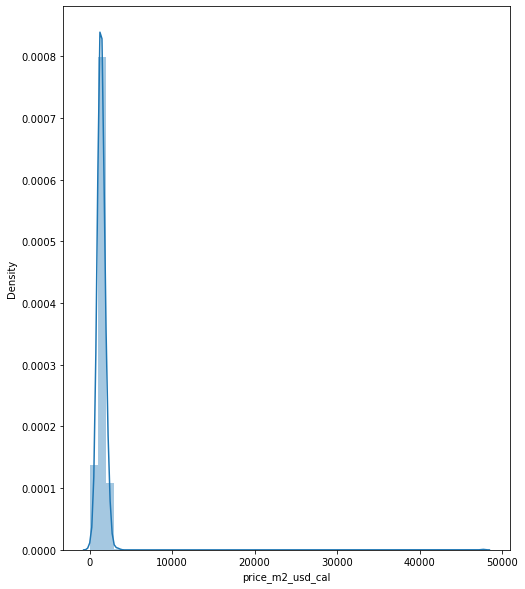

In [ ]:
plt.figure(figsize=(8,10))
sns.distplot(data_cba_sin_null['price_m2_usd_cal'])
plt.show()

Vemos que el grafico esta condicionado por los outliers

In [ ]:
fig = px.box(data_frame=data_cba_sin_null, y="price_m2_usd_cal")

fig.update_layout(
    title={
        'text': "Distribución de precios por m2 en dolares",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Precio por m2 en dolares",
    font=dict(
        family="Arial",
        size=12))
fig.show()

Al igual que este

In [ ]:
data_cba_sin_null["price_m2_usd_cal"].isna().sum()

0

In [ ]:
# filtrado intercuartílico para precio x m2. Ahora si funciona y utilizamos ambos limites para la extraccion de outliers 

Q25 = np.percentile(data_cba_sin_null["price_m2_usd_cal"], 25)
Q75 = np.percentile(data_cba_sin_null["price_m2_usd_cal"], 75)
IQR = Q75 - Q25
ulimit = Q75 + 1.5*IQR
llimit = Q25 - 1.5*IQR
print(ulimit, llimit, 'son los límites superior y límite inferior')
# Creo la serie booleana under_umbral_menor
under_umbral_menor = (data_cba_sin_null["price_m2_usd_cal"] < llimit).map({True:'under umbral menor', False:'over umbral menor'})
outliers_umbral_menor_count = data_cba_sin_null.groupby(under_umbral_menor)["price_m2_usd_cal"].count()
# Creo la serie booleana: over_umbral_mayor
over_umbral_mayor = (data_cba_sin_null["price_m2_usd_cal"] > ulimit).map({True:'over umbral mayor', False:'under umbral mayor'})
outliers_umbral_mayor_count =data_cba_sin_null.groupby(over_umbral_mayor)["price_m2_usd_cal"].count()
print("Total outliers: ", outliers_umbral_menor_count['under umbral menor']+ outliers_umbral_mayor_count['over umbral mayor'] )

2355.6512500000003 382.90124999999955 son los límites superior y límite inferior
Total outliers:  45


In [ ]:
data_cba_sin_null["price_m2_usd_cal"]

0        617.52
1        943.40
2       1643.84
4       1705.88
6       2110.37
         ...   
2735    1100.00
2736    1000.00
2737    1272.73
2738    1250.00
2739    1375.00
Name: price_m2_usd_cal, Length: 1868, dtype: float64

In [ ]:
data_cba_sin_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 2739
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1868 non-null   int64  
 1   price                   1868 non-null   float64
 2   currency                1868 non-null   object 
 3   surface_total_in_m2     1159 non-null   float64
 4   surface_covered_in_m2   1689 non-null   float64
 5   price_usd_per_m2        1159 non-null   float64
 6   price_per_m2            1689 non-null   float64
 7   rooms                   490 non-null    float64
 8   properati_url           1868 non-null   object 
 9   description             1868 non-null   object 
 10  title                   1868 non-null   object 
 11  price_usd               1868 non-null   float64
 12  price_m2_usd_cal        1868 non-null   float64
 13  surface_cov_in_m2_fill  1868 non-null   float64
dtypes: float64(9), int64(1), object(4)
memor

In [ ]:
##Incorporamos los limites y hacemos un merge entre el creado y el original
df_filtered_v0 = data_cba_sin_null.loc[data_cba_sin_null["price_m2_usd_cal"]< ulimit]
df_filtered_v1 = df_filtered_v0.loc[data_cba_sin_null["price_m2_usd_cal"]> llimit]
data_cba_filtered=pd.merge(df_filtered_v1,data_cba_sin_null, how='inner')
print(data_cba_filtered.shape)
print(df_filtered_v1.shape)
print(data_cba_filtered.shape)

(1823, 14)
(1823, 14)
(1823, 14)


c:\Users\mt37931878\Anaconda3\envs\dhdsblend2021\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



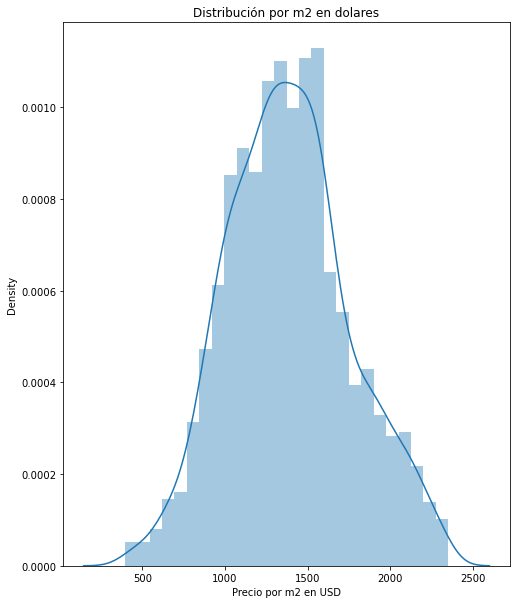

In [ ]:



plt.figure(figsize=(8,10))
sns.distplot(data_cba_filtered.price_m2_usd_cal).set(title = "Distribución por m2 en dolares", xlabel= "Precio por m2 en USD")
plt.show()

Ahora, sin outliers, el grafico es correcto y nos arroja una distribucion normal como teniamos previsto.

In [ ]:
fig = px.box(data_frame=data_cba_filtered, y="price_m2_usd_cal")

fig.update_layout(
    title={
        'text': "Distribución de precios por m2 en dolares",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    yaxis_title="Precio por m2 en dolares",
    font=dict(
        family="Arial",
        size=12))
fig.show()

Siendo el grueso de los datos entre 1200 y 1600.

In [ ]:
data_cba_filtered["price_m2_usd_cal"].sort_values()

199      392.96
157      403.10
318      412.44
339      433.79
413      441.08
         ...   
1522    2333.33
1240    2333.33
1721    2339.08
1196    2339.08
159     2350.77
Name: price_m2_usd_cal, Length: 1823, dtype: float64

In [ ]:
data_cba_filtered.price_m2_usd_cal.describe()

count    1823.000000
mean     1386.852501
std       371.295664
min       392.960000
25%      1122.760000
50%      1367.720000
75%      1599.190000
max      2350.770000
Name: price_m2_usd_cal, dtype: float64

### Vamos a avanzar con la columna rooms que tiene muchas filas vacias

In [ ]:
#Hay 1338 filas vacias en la columna rooms
data_cba_filtered.isna().sum()

Unnamed: 0                   0
price                        0
currency                     0
surface_total_in_m2        690
surface_covered_in_m2      177
price_usd_per_m2           690
price_per_m2               177
rooms                     1352
properati_url                0
description                  0
title                        0
price_usd                    0
price_m2_usd_cal             0
surface_cov_in_m2_fill       0
dtype: int64

##### Generamos un df aparte que tenga solamente las filas vacias en rooms para ir completandolas

In [ ]:
data_cba_na = data_cba_filtered.loc[data_cba_filtered.rooms.isna(), :]
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,NaN,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0


In [ ]:
#Generamos y extraemos dormitorios con expresion regular.
regex = r'(?P<dorm>\d)\sdorm?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['description'].str.extract(regex)], axis=1)
data_cba_na.head(2)



,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,dorm
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,NaN,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,NaN


In [ ]:
#Asigno dorm a rooms. Luego dropeo dorm
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.dorm
data_cba_na = data_cba_na.drop(columns = "dorm", axis = 1)

In [ ]:
#Se bajo a 859 los na en rooms
data_cba_na.rooms.isna().sum()

868

In [ ]:
#Repetimos el proceso con otra expresion
regex = r'(?P<DORM>\d)\sDORM?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['description'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,DORM
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,NaN,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,1


In [ ]:
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.DORM
data_cba_na = data_cba_na.drop(columns = "DORM", axis = 1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0


In [ ]:
#Se bajo a 659 los na en rooms
data_cba_na.rooms.isna().sum()

665

In [ ]:
#Repetimos nuevamente el proceso con otra expresion
regex = r'(?P<Dorm>\d)\sDorm?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['description'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,Dorm
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,NaN


In [ ]:
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Dorm
data_cba_na = data_cba_na.drop(columns = "Dorm", axis = 1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0


In [ ]:
#Se bajo a 447 los na en rooms
data_cba_na.rooms.isna().sum()

452

In [ ]:
#Y nuevamente
regex = r'(?P<dorm>\d)\sdorm?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['title'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,dorm
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,NaN


In [ ]:
regex = r'(?P<DORM>\d)\sDORM?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['title'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,dorm,DORM
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,NaN,1


In [ ]:
regex = r'(?P<Dorm>\d)\sDorm?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['title'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,dorm,DORM,Dorm
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,NaN,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,NaN,NaN,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,NaN,1,NaN


In [ ]:
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.DORM
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Dorm
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.dorm

In [ ]:
data_cba_na = data_cba_na.drop(columns=["dorm","Dorm", "DORM"], axis=1)

In [ ]:
#Se bajo a 372
data_cba_na.rooms.isna().sum()

375

In [ ]:
#Ahora lo hacemos para monoambiente
pattern_nombre = "monoambiente"

pattern_nombre_regex = re.compile(pattern_nombre, flags= re.IGNORECASE)
ambientes = data_cba_na.description
resultado_ambientes = ambientes.apply(lambda x: pattern_nombre_regex.search(x))

#print(resultado_ambientes)
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group(0))
ambientes_match.head(2)

18    monoambiente
19            None
Name: description, dtype: object

In [ ]:
#Se bajan a 629
data_cba_na["Ambientes"] = ambientes_match
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == "monoambiente", 1, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == "Monoambiente", 1, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == "MONOAMBIENTE", 1, data_cba_na["Ambientes"] )
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Ambientes
data_cba_na.rooms.isna().sum()


349

In [ ]:
#Ahora para un dormitorio
pattern_nombre = "un dormitorio"

pattern_nombre_regex = re.compile(pattern_nombre, flags= re.IGNORECASE)
ambientes = data_cba_na.description
resultado_ambientes = ambientes.apply(lambda x: pattern_nombre_regex.search(x))

#print(resultado_ambientes)
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group(0))
ambientes_match.head(2)

18    None
19    None
Name: description, dtype: object

In [ ]:
data_cba_na["Ambientes"] = ambientes_match
data_cba_na["Ambientes"].unique()

array([None, 'UN DORMITORIO', 'un dormitorio', 'Un dormitorio',
       'Un Dormitorio', 'UN Dormitorio', 'un Dormitorio'], dtype=object)

In [ ]:

data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'un dormitorio', 2, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'Un dormitorio', 2, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'Un Dormitorio', 2, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'UN Dormitorio', 2, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'UN DORMITORIO', 2, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'un Dormitorio', 2, data_cba_na["Ambientes"] )
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Ambientes
data_cba_na.rooms.isna().sum()

279

In [ ]:
#Ahora para dos dormitorios
pattern_nombre = "Dos Dormitorios"

pattern_nombre_regex = re.compile(pattern_nombre, flags= re.IGNORECASE)
ambientes = data_cba_na.description
resultado_ambientes = ambientes.apply(lambda x: pattern_nombre_regex.search(x))

#print(resultado_ambientes)
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group(0))
ambientes_match.head()

18    None
19    None
24    None
25    None
27    None
Name: description, dtype: object

In [ ]:
data_cba_na["Ambientes"] = ambientes_match
data_cba_na["Ambientes"].unique()

array([None, 'Dos dormitorios', 'DOS DORMITORIOS', 'dos dormitorioS',
       'dos dormitorios', 'Dos Dormitorios'], dtype=object)

In [ ]:

data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'Dos dormitorios', 3, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'DOS DORMITORIOS', 3, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'Dos Dormitorios', 3, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'dos dormitorios', 3, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'dos dormitorioS', 3, data_cba_na["Ambientes"] )
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Ambientes
data_cba_na.rooms.isna().sum()

239

In [ ]:
# 3 dormitorios
pattern_nombre = "tres Dormitorios"

pattern_nombre_regex = re.compile(pattern_nombre, flags= re.IGNORECASE)
ambientes = data_cba_na.description
resultado_ambientes = ambientes.apply(lambda x: pattern_nombre_regex.search(x))

#print(resultado_ambientes)
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group(0))
ambientes_match.head()

18    None
19    None
24    None
25    None
27    None
Name: description, dtype: object

In [ ]:
data_cba_na["Ambientes"] = ambientes_match
data_cba_na["Ambientes"].unique()

array([None, 'tres dormitorios', 'tres Dormitorios'], dtype=object)

In [ ]:

data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'tres dormitorios', 4, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'tres Dormitorios', 4, data_cba_na["Ambientes"] )
data_cba_na["Ambientes"] = np.where(data_cba_na["Ambientes"] == 'Tres dormitorios', 4, data_cba_na["Ambientes"] )
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.Ambientes
data_cba_na.rooms.isna().sum()

229

In [ ]:
regex = r'(?P<d>\d)\sd?'
data_cba_na = pd.concat([data_cba_na, data_cba_na['title'].str.extract(regex)], axis=1)
data_cba_na.head(2)

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,Ambientes,d
18,5846,44000.0,USD,31.0,31.0,1419.35,1419.35,1,http://www.properati.com.ar/15s0p_venta_depart...,DEPARTAMENTO EN PLENO CENTRO DE NUEVA CORDOBA....,Vendo de Monoabiente en el corazón de Nueva Có...,44000.00,1419.35,31.0,None,NaN
19,6085,850000.0,USD,NaN,50.0,NaN,17000.00,1,http://www.properati.com.ar/15smm_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,DEPARTAMENTO EN AV. PATRIA DE 1 DORMITORIO COR...,47717.14,954.34,50.0,None,1


In [ ]:
data_cba_na.loc[data_cba_na.rooms.isna(), "rooms"] = data_cba_na.d

In [ ]:
data_cba_na = data_cba_na.drop(columns= "d", axis = 1)

In [ ]:
data_cba_na.isna().sum()

Unnamed: 0                   0
price                        0
currency                     0
surface_total_in_m2        482
surface_covered_in_m2      164
price_usd_per_m2           482
price_per_m2               164
rooms                      221
properati_url                0
description                  0
title                        0
price_usd                    0
price_m2_usd_cal             0
surface_cov_in_m2_fill       0
Ambientes                 1331
dtype: int64

Le asignamos los valores que pudimos obtener con las expresiones regulares a la columna de rooms del df original cuando tengan na
y para poder pasarla a int rellenamos los na que quedaban (219) con 0

In [ ]:
data_cba_filtered.loc[data_cba_filtered.rooms.isna(), "rooms"] = data_cba_na.rooms
data_cba_filtered.loc[data_cba_filtered.rooms.isna(), "rooms"] = 0
data_cba_filtered.rooms.isna().sum()
data_cba_filtered["rooms"] = data_cba_filtered["rooms"].astype(int)

In [ ]:
#Hay valores para deptos con mas de 6 habitaciones. Revisar esos casos
data_cba_filtered.rooms.value_counts()

1     658
2     608
0     223
3     214
4      71
5      30
6      11
7       3
10      2
8       2
9       1
Name: rooms, dtype: int64

In [ ]:


fig = px.scatter(data_cba_filtered, x = "rooms", y = "price_usd", hover_data=["surface_cov_in_m2_fill"])
fig.show()

In [ ]:
data_cba_filtered.groupby("rooms")[[ 'price_m2_usd_cal',"surface_cov_in_m2_fill"]].median().round()

,price_m2_usd_cal,surface_cov_in_m2_fill
rooms,,
0,1282.0,52.0
1,1382.0,45.0
2,1456.0,57.0
3,1273.0,65.0
4,1239.0,65.0
5,1054.0,79.0
6,1048.0,72.0
7,997.0,84.0
8,1345.0,125.0


Generamos esta tabla para ver la mediana de los precios y en especial de la superficie de los deptos segun su cantidad de habitaciones. Vemos que a partir de 5 rooms la superficies no tienen mucho sentido(muchas habitaciones y pocos m2). Por eso decidimos cambiar la cantidad de habitaciones de cualquiera que sea de mas de 4 ambientes.

In [ ]:
data_cba_filtered_rooms = data_cba_filtered.loc[data_cba_filtered.rooms.isin([0,5,6,7,8,9,10]), :]
data_cba_filtered_rooms.head()

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill
10,1379,1750000.0,USD,75.0,75.0,1308.62,23333.33,6,http://www.properati.com.ar/15i4a_venta_depart...,"EN VENTA, excelente oportunidad, departamento ...",DEPARTAMENTO A ESTRENAR 2 DORMITORIOS ALTA COR...,98241.16,1309.88,75.0
16,5151,1000000.0,USD,NaN,64.0,NaN,15625.00,5,http://www.properati.com.ar/15p90_venta_depart...,Corredor Responsable: Juan Manuel Quiroga - CP...,SE VENDE DEPTO ALTA CORDOBA + FINANCIACION,56137.81,877.15,64.0
20,6098,850000.0,USD,NaN,70.0,NaN,12142.86,6,http://www.properati.com.ar/15sp5_venta_depart...,Corredor Responsable: Carlos Borra - CPCPI 490...,Venta Departamento 3 dormitorios C/ Cochera,47717.14,681.67,70.0
27,7041,630000.0,USD,42.0,42.0,841.26,15000.00,0,http://www.properati.com.ar/15wdh_venta_depart...,Departamento ubicado en un complejo de 11 unid...,"ALBERDI DUPLEX, UN DORMITORIO",35366.82,842.07,42.0
32,7414,1400000.0,USD,75.0,75.0,1046.90,18666.67,6,http://www.properati.com.ar/15xuo_venta_depart...,"Con una privilegiada ubicación, a pasos de Cen...","A Estrenar! COFICO - DEPTO 2 DORM, 2Baños- Cal...",78592.93,1047.91,75.0


In [ ]:
#Generamos con pd.cut unos bins(establecidos de acuerdo a los valores de la tabla de arriba) para asignar habitaciones
# de acuerdo a ellos
data_cba_filtered_rooms["rooms_clean"] = pd.cut(x = data_cba_filtered["surface_cov_in_m2_fill"], bins =[0, 45, 57, 73, 1000], labels = [1, 2, 3, 4])
data_cba_filtered_rooms = data_cba_filtered_rooms.loc[:, ["Unnamed: 0","rooms_clean"]]

C:\Users\mt37931878\AppData\Local\Temp\ipykernel_18160\3265751700.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Mergeamos el df recien creado con el original
data_cba_filtered = data_cba_filtered.merge(data_cba_filtered_rooms, on = "Unnamed: 0" , how = "left")
data_cba_filtered.head()

,Unnamed: 0,price,currency,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,properati_url,description,title,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,rooms_clean
0,32,550000.0,USD,50.0,50.0,616.92,11000.00,3,http://www.properati.com.ar/15bry_venta_depart...,"EN VENTA, departamento ubicado en barrio Pueyr...",Departamento apto crédito! Barrio Pueyrredon,30875.79,617.52,50.0,NaN
1,89,50000.0,USD,NaN,53.0,NaN,943.40,1,http://www.properati.com.ar/15bzr_venta_depart...,Departamento en Venta de 1 dorm. en Cordoba,Muy amplio departamento sobre Julio A. R,50000.00,943.40,53.0,NaN
2,92,120000.0,USD,NaN,73.0,NaN,1643.84,2,http://www.properati.com.ar/15c03_venta_depart...,Departamento en Venta de 2 dorm. en Cordoba,Depto en Nva Cba - Edificio Eystam,120000.00,1643.84,73.0,NaN
3,191,145000.0,USD,NaN,85.0,NaN,1705.88,2,http://www.properati.com.ar/15dft_venta_depart...,Departamento en Venta de 2 dorm. en Cordoba,DEPTO B. GRAL. PAZ - FRENTE PLAZA ALBERD,145000.00,1705.88,85.0,NaN
4,391,2030000.0,USD,54.0,54.0,2108.33,37592.59,2,http://www.properati.com.ar/15eds_venta_depart...,Precio 2030000 COFICO - GRAL. URQUIZA 1500: E...,Departamento | 2 dormitorios,113959.75,2110.37,54.0,NaN


In [ ]:
#Asignamos los valores de acuerdo a las gestiones anteriores
data_cba_filtered.loc[data_cba_filtered["rooms_clean"].isna(), "rooms_clean"] = data_cba_filtered.rooms

In [ ]:
#Y dropeamos rooms dado que ya tenemos la nueva
data_cba_filtered = data_cba_filtered.drop(columns=("rooms"), axis= 1)

# Extraer datos de amenities de url, title y  description

### Cochera

In [ ]:
#Pasamos a str url
data_cba_filtered['properati_url']= data_cba_filtered['properati_url'].astype('str')

In [ ]:
#Hacemos un split con los datos para poder verificar que amenities aparecen y elegir las que consideremos
patron_guion_bajo = "_"

compilador_guion_bajo = re.compile(patron_guion_bajo, flags = re.IGNORECASE)
URL_series = data_cba_filtered['properati_url']
resultado_URL = URL_series.apply(lambda x: compilador_guion_bajo.split(x))
#En esta fila se puede ir cambiando el valor siguiente a get para entrar en los distintos niveles y ver otros datos
URL_serie_1 = pd.Series(resultado_URL.str.get(6)).unique()
print(URL_serie_1)

['dcr-broker-inmobiliaria' nan 'luminoso' 'piscina' 'balcon' 'hidromasaje'
 'compreprop-com' 'placard' 'cordoba-real-estate' 'amoblado' 'patio'
 'garage' 're-max-mediterranea-iii'
 'vision-compartida-consultora-inmobiliaria' 'nepote' 'aire-acondicionado'
 'estrenar' 'toilette' 'vestidor' 'puerto-raiz' 'baulera'
 'reyna-quintana-grupo-inmobiliario' 'sasa-inversiones'
 'inmobiliaria-terra' 'sum' 'muoz-negocios-inmobiliarios' 'terraza'
 're-max-mediterra-nea-ii' 'amenities' 'vista' 'lujoso'
 'rossi-bienes-raices' 'arturo-a-negocios-inmobiliarios' 'quincho'
 'ballari-bienes-raices' 'dueno-directo' 'caballero-luciano'
 'la-docta-inmobiliaria' 'impecable' 'red-inmobiliaria'
 'loza-servicios-inmobiliarios' 'apto-credito-hipotecario' 'dependencias'
 'parin' 'augusto-lopez' 'lavadero' 're-max-mediterranea-iv'
 'estrategia-inmobiliaria' 're-max-mediterranea-vi' 's-a-inmuebles'
 're-max-mediterr-aacute-nea' 'omega-op' 'rodi-brandaan'
 'taiana-propiedades' 'gimnasio' 'duit-propiedades' 'gcx' 'gd1'

In [ ]:
## Genero funcion que busca patrones en url, title y description, genera una columna con el nombre del segundo parametro y asigna 0 o 1 
##dependiendo de si matcheo o no.
def extraer_amenities(patron,columna_nueva):
    patron_ame= str(patron)
    compilador = re.compile(patron_ame,flags=re.IGNORECASE)
    match_url = data_cba_filtered['properati_url'].apply(lambda x: x if x is np.NaN else compilador.search(x))
    match_title = data_cba_filtered['title'].apply(lambda x: x if x is np.NaN else compilador.search(x))
    match_description = data_cba_filtered['description'].apply(lambda x: x if x is np.NaN else compilador.search(x))
    print('----------------------------------------------------------')
    print(str(patron))
    print(f'URL hizo {match_url.count()} match, title hizo {match_title.count()} match y description hizo {match_description.count()} match.')
    mascara = match_url.notna() | match_title.notna() | match_description.notna()
    print(mascara.value_counts())
    print('----------------------------------------------------------')
    data_cba_filtered[str(columna_nueva)] = 0
    data_cba_filtered.loc[mascara,str(columna_nueva)] = 1

In [ ]:
##Genero una lista con los primeros valores que buscaremos para cada columna nueva. Si tengo que buscar otro valor para la misma columna lo
#hare manualmente
lista_amenities = ['garage', 'balcon', 'parrilla','amenities', 'piscina' ,'estrenar', 'patio', 'terraza', 'gimnasio','amoblado', 'quincho', 'sum', 'sauna', 'hidromasaje','suite', 'lavadero', 'jardin', "pozo"]

for i in lista_amenities:
    extraer_amenities(i,i)

----------------------------------------------------------
garage
URL hizo 406 match, title hizo 0 match y description hizo 1 match.
False    1417
True      406
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
balcon
URL hizo 1017 match, title hizo 38 match y description hizo 395 match.
True     1027
False     796
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
parrilla
URL hizo 18 match, title hizo 0 match y description hizo 17 match.
False    1804
True       19
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
amenities
URL hizo 196 match, title hizo 15 match y description hizo 204 match.
False    1612
True      211
dtype: int64
----------------------------------------------------------
--------------------------------------------------------

In [ ]:
extraer_amenities('cocheras','garage')
extraer_amenities('cochera','garage')
extraer_amenities('balcones','balcon')
extraer_amenities('parrillas','parrilla')
extraer_amenities('pileta','piscina')
extraer_amenities('gym','gimnasio')
extraer_amenities('gim','gimnasio')

----------------------------------------------------------
cocheras
URL hizo 0 match, title hizo 2 match y description hizo 251 match.
False    1572
True      251
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
cochera
URL hizo 0 match, title hizo 43 match y description hizo 389 match.
False    1427
True      396
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
balcones
URL hizo 0 match, title hizo 8 match y description hizo 255 match.
False    1565
True      258
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
parrillas
URL hizo 0 match, title hizo 0 match y description hizo 2 match.
False    1821
True        2
dtype: int64
----------------------------------------------------------
----------------------------------------------------------
pi

### Verificamos estado actual del df y reordenamos para su presentacion final

In [ ]:
data_cba_filtered.shape

(1823, 32)

In [ ]:
data_cba_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1823 entries, 0 to 1822
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Unnamed: 0              1823 non-null   int64   
 1   price                   1823 non-null   float64 
 2   currency                1823 non-null   object  
 3   surface_total_in_m2     1133 non-null   float64 
 4   surface_covered_in_m2   1646 non-null   float64 
 5   price_usd_per_m2        1133 non-null   float64 
 6   price_per_m2            1646 non-null   float64 
 7   properati_url           1823 non-null   object  
 8   description             1823 non-null   object  
 9   title                   1823 non-null   object  
 10  price_usd               1823 non-null   float64 
 11  price_m2_usd_cal        1823 non-null   float64 
 12  surface_cov_in_m2_fill  1823 non-null   float64 
 13  rooms_clean             1823 non-null   category
 14  garage                  

In [ ]:
data_cba_filtered.columns

Index(['Unnamed: 0', 'price', 'currency', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2',
       'properati_url', 'description', 'title', 'price_usd',
       'price_m2_usd_cal', 'surface_cov_in_m2_fill', 'rooms_clean', 'garage',
       'balcon', 'parrilla', 'amenities', 'piscina', 'estrenar', 'patio',
       'terraza', 'gimnasio', 'amoblado', 'quincho', 'sum', 'sauna',
       'hidromasaje', 'suite', 'lavadero', 'jardin', 'pozo'],
      dtype='object')

In [ ]:
#Dropeamos todas las columnas ya no utilizadas
data_cba_filtered = data_cba_filtered.drop(columns=['price','surface_total_in_m2','currency', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2','properati_url', 'description', 'title'])

In [ ]:
#Generamos lista con orden correcto de columnas. Asignamos en la siguiente celda
orden_correcto_columnas = ['Unnamed: 0','price_usd','price_m2_usd_cal',
       'surface_cov_in_m2_fill',"rooms_clean", 'garage', 'balcon', 'parrilla', 'amenities',
       'piscina', 'estrenar', 'patio', 'terraza', 'gimnasio',
       'amoblado', 'quincho', 'sum', 'sauna', 'hidromasaje', 'suite',
       'lavadero', 'jardin']

In [ ]:
data_cba_filtered = data_cba_filtered.loc[:,orden_correcto_columnas]

In [ ]:
data_cba_filtered.head()

,Unnamed: 0,price_usd,price_m2_usd_cal,surface_cov_in_m2_fill,rooms_clean,garage,balcon,parrilla,amenities,piscina,...,terraza,gimnasio,amoblado,quincho,sum,sauna,hidromasaje,suite,lavadero,jardin
0,32,30875.79,617.52,50.0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,89,50000.00,943.40,53.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,92,120000.00,1643.84,73.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,191,145000.00,1705.88,85.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,391,113959.75,2110.37,54.0,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


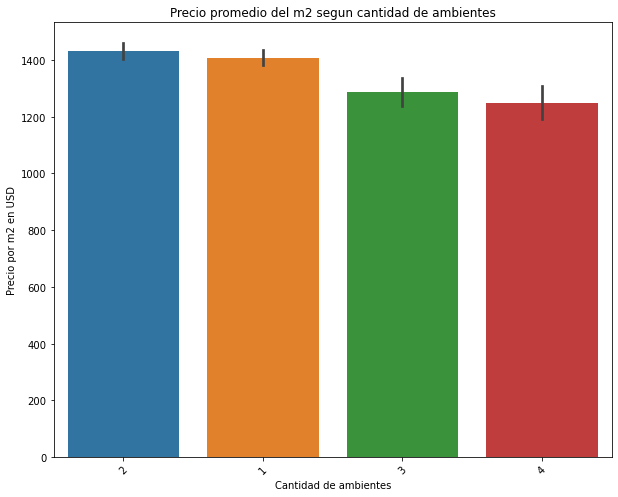

In [ ]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation = 45)
rooms = data_cba_filtered.groupby('rooms_clean').median().sort_values('price_m2_usd_cal', ascending=False).index
sns.barplot(x="rooms_clean", y="price_m2_usd_cal", order=rooms, data=data_cba_filtered).set(title= "Precio promedio del m2 segun cantidad de ambientes", xlabel = "Cantidad de ambientes", ylabel = "Precio por m2 en USD")
plt.show()

In [ ]:

fig = px.pie(data_frame=data_cba_filtered, names = "rooms_clean")
             

fig.update_layout(
    title={
        'text': "Total de departamentos segun cantidad de ambientes",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    legend_title = "Cantidad de ambientes",
    font=dict(
        family="Arial",
        size=12))
fig.update_layout(
    legend=dict(
        x=0,
        y=1,
        title_font_family="Arial",
        font=dict(
            family="Arial",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2))
fig.show()

**Actualmente nuestro df esta conformado en un 40,6% por monoambientes, en un 38% por dos ambientes, reprensentando entre ambas categorias practicamente un 80% de los datos**

In [ ]:
fig = px.scatter(data_frame= data_cba_filtered, x = 'surface_cov_in_m2_fill', y= "price_m2_usd_cal")

fig.update_layout(
    title={
        'text': "Distribución de precios por m2",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title = "Superficie cubierta en m2",
    yaxis_title = "Precio por m2",
    font=dict(
        family="Arial",
        size=12))


fig.show()



**La mayoria de los ambientes estan agrupados en torno a los 50 m2**

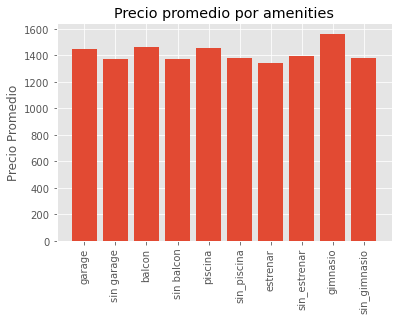

In [ ]:
mask_garage = data_cba_filtered.garage == 1 
cuenta_garage = data_cba_filtered[mask_garage]['price_m2_usd_cal'].mean()
mask_singarage = data_cba_filtered.garage == 0 
cuenta_singarage = data_cba_filtered[mask_singarage]['price_m2_usd_cal'].mean()

mask_balcon = data_cba_filtered.balcon == 1 
cuenta_balcon = data_cba_filtered[mask_balcon]['price_m2_usd_cal'].mean()
mask_sinbalcon = data_cba_filtered.balcon == 0 
cuenta_sinbalcon = data_cba_filtered[mask_sinbalcon]['price_m2_usd_cal'].mean()

mask_piscina = data_cba_filtered.piscina == 1 
cuenta_piscina = data_cba_filtered[mask_piscina]['price_m2_usd_cal'].mean()
mask_sinpiscina = data_cba_filtered.piscina == 0 
cuenta_sinpiscina = data_cba_filtered[mask_sinpiscina]['price_m2_usd_cal'].mean()

mask_estrenar = data_cba_filtered.estrenar == 1 
cuenta_estrenar = data_cba_filtered[mask_estrenar]['price_m2_usd_cal'].mean()
mask_sinestrenar = data_cba_filtered.estrenar == 0 
cuenta_sinestrenar = data_cba_filtered[mask_sinestrenar]['price_m2_usd_cal'].mean()

mask_gimnasio = data_cba_filtered.gimnasio == 1 
cuenta_gimnasio = data_cba_filtered[mask_gimnasio]['price_m2_usd_cal'].mean()
mask_singimnasio = data_cba_filtered.gimnasio == 0 
cuenta_singimnasio = data_cba_filtered[mask_singimnasio]['price_m2_usd_cal'].mean()

index_1 = ['garage','sin garage','balcon','sin balcon','piscina','sin_piscina','estrenar','sin_estrenar','gimnasio','sin_gimnasio']
graf_1 = [cuenta_garage, cuenta_singarage, cuenta_balcon, cuenta_sinbalcon, cuenta_piscina, cuenta_sinpiscina, cuenta_estrenar, cuenta_sinestrenar, cuenta_gimnasio, cuenta_singimnasio]



plt.style.use('ggplot')
plt.bar(index_1, graf_1)
plt.xticks(rotation=90)
plt.title('Precio promedio por amenities')
plt.ylabel('Precio Promedio')
plt.show()